<a href="https://colab.research.google.com/github/talhaanwarch/skin_cancer_detection_phone_camera/blob/master/transfer_learning_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
print('Are you using the model for the first time')
if input('y/n \n')=='y':
  print('donwloading the model')
  !wget https://www.kaggleusercontent.com/kf/40082680/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..E_XAUtjdDidxaML8Ct3SAg.X6vbQHK5QH7vnYLcyAGqMAEPr0cshww9Tsz_PlQ_xlKmUmcXHKD1TL1nS3cqyjp6s2-NDkIBBwko2LkoNtMwugZ8KG8UoqnRoqCBRbZ-seJBlRPu6aE6cIPMrmTjYAiRTQkfwCGm7Bb70uGdFse8DMBnDGyfQf285Hxhz9tcNdGCwfDNvf3bpxYgWiIIMTCffT0mZnHOq-5pEU5OhC5tdh8bQuuWGWUIgO9xcYvoYQNZdyeQh3-oi3F7LHZxl39pqjXZZLIP5aafs4tl-0mYCtbNGki6naV-sNSrDU4aRDjomqTcxKO4fHkJwlJYMrjGLuXnupa21NxAEyvbQmU5p2DABSAyWzuq_7yAdoLC4HozKcyZPlSWCmAS4_urG1EEZ0ao1FC9Ocms4jeGUDXDWOydqRoKPBMJHzn_S3fad07pinwTBvwj3tSUHEw7VWFYEyZR6Ffn6U4o6qMcSTMMweRuXDC0aNJg5u_3uzuqJsJdye2_NeGMX0bQ15zKtKK3Q6bZ1y4b4JVqO7yPtLJWBfyUBFFrQ1dWgmpkmlSRrFyXAqFBGmCBhYl-6yl0XVgRYrwbd0TptPc_8u6iROMUOxMWtkyNTWbFhxmxrVqkz4t5R1rFtZ61joTZ_8g_dx-in_yJTpCLqQfnwS-B9G6vIQ.2QRaAD9Er0LczqFQSDoaTg/ham_eff3_weights.hdf5
  print('saving model to drive')
  !cp /content/ham_eff3_weights.hdf5  /content/drive/My\ Drive/
else:
  print('load model from thie google drive') 
  !cp /content/drive/My\ Drive/ham_eff3_weights.hdf5 /content/

Are you using the model for the first time
y/n 
y
donwloading the model
--2020-08-04 01:47:56--  https://www.kaggleusercontent.com/kf/40082680/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..E_XAUtjdDidxaML8Ct3SAg.X6vbQHK5QH7vnYLcyAGqMAEPr0cshww9Tsz_PlQ_xlKmUmcXHKD1TL1nS3cqyjp6s2-NDkIBBwko2LkoNtMwugZ8KG8UoqnRoqCBRbZ-seJBlRPu6aE6cIPMrmTjYAiRTQkfwCGm7Bb70uGdFse8DMBnDGyfQf285Hxhz9tcNdGCwfDNvf3bpxYgWiIIMTCffT0mZnHOq-5pEU5OhC5tdh8bQuuWGWUIgO9xcYvoYQNZdyeQh3-oi3F7LHZxl39pqjXZZLIP5aafs4tl-0mYCtbNGki6naV-sNSrDU4aRDjomqTcxKO4fHkJwlJYMrjGLuXnupa21NxAEyvbQmU5p2DABSAyWzuq_7yAdoLC4HozKcyZPlSWCmAS4_urG1EEZ0ao1FC9Ocms4jeGUDXDWOydqRoKPBMJHzn_S3fad07pinwTBvwj3tSUHEw7VWFYEyZR6Ffn6U4o6qMcSTMMweRuXDC0aNJg5u_3uzuqJsJdye2_NeGMX0bQ15zKtKK3Q6bZ1y4b4JVqO7yPtLJWBfyUBFFrQ1dWgmpkmlSRrFyXAqFBGmCBhYl-6yl0XVgRYrwbd0TptPc_8u6iROMUOxMWtkyNTWbFhxmxrVqkz4t5R1rFtZ61joTZ_8g_dx-in_yJTpCLqQfnwS-B9G6vIQ.2QRaAD9Er0LczqFQSDoaTg/ham_eff3_weights.hdf5
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.

In [1]:
%%capture
!pip install efficientnet

In [2]:
#download the dataset
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip

--2020-08-04 01:31:19--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.61.192
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.61.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3593344681 (3.3G) [application/octet-stream]
Saving to: ‘zr7vgbcyr2-1.zip’

zr7vgbcyr2-1.zip    100%[===================>]   3.35G  41.7MB/s    in 58s     

2020-08-04 01:32:17 (59.2 MB/s) - ‘zr7vgbcyr2-1.zip’ saved [3593344681/3593344681]



In [4]:
#unzip the dataset
%%capture
!unzip zr7vgbcyr2-1.zip

In [5]:
#create a new folder named as data
!mkdir data

In [6]:
#unzip all subfolder
%%capture
!unzip /content/images/imgs_part_1.zip
!unzip /content/images/imgs_part_2.zip
!unzip /content/images/imgs_part_3.zip

In [7]:
#move all pictures from subfolder to main folder data
!mv  /content/imgs_part_1/* /content/data
!mv  /content/imgs_part_2/* /content/data
!mv  /content/imgs_part_3/* /content/data

In [8]:
#remove the folder that contain subfolders
!rm -r /content/images

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#read annotation file
df=pd.read_csv('/content/metadata.csv')
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [11]:
#create a dataframe with image name and encoded labels
labels=pd.get_dummies(df['diagnostic'])
df=pd.concat([df['img_id'],labels],axis=1)
df.head()

,img_id,ACK,BCC,MEL,NEV,SCC,SEK
0,PAT_1516_1765_530.png,0,0,0,1,0,0
1,PAT_46_881_939.png,0,1,0,0,0,0
2,PAT_1545_1867_547.png,1,0,0,0,0,0
3,PAT_1989_4061_934.png,1,0,0,0,0,0
4,PAT_684_1302_588.png,0,1,0,0,0,0


In [12]:
#shuffle the dataframe
df=df.sample(frac=1)
df.head()

,img_id,ACK,BCC,MEL,NEV,SCC,SEK
1075,PAT_1837_3608_851.png,0,0,0,1,0,0
135,PAT_1414_1432_969.png,1,0,0,0,0,0
827,PAT_690_1309_217.png,0,1,0,0,0,0
223,PAT_940_1774_962.png,0,0,0,0,1,0
2131,PAT_1563_2425_443.png,0,0,0,0,0,1


In [14]:
#labels columns in dataframe
col=list(df.columns)[1::]
col

['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

In [15]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest')

In [57]:
# model hyperparameters
img_shape=300
batch_size=24
n_epochs=20

In [58]:
from sklearn.model_selection import train_test_split
train,val=train_test_split(df,test_size=0.2)

In [59]:
train_generator=data_gen.flow_from_dataframe(train,directory='/content/data',
                                                  target_size=(img_shape,img_shape),
                                                  x_col='img_id',
                                                  y_col=col,
                                                  class_mode='raw',
                                                  shuffle=True,
                                                  batch_size=batch_size)

val_generator=data_gen.flow_from_dataframe(val,directory='/content/data',
                                                        target_size=(img_shape,img_shape),
                                                        x_col="img_id",
                                                        y_col=col,
                                                        class_mode='raw',
                                                        shuffle=False,
                                                        batch_size=batch_size)

Found 1838 validated image filenames.
Found 460 validated image filenames.


In [60]:
train_generator.next()[0].shape,train_generator.next()[1].shape

((24, 300, 300, 3), (24, 6))

In [61]:
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential,Model

In [62]:
#first create the pretrained model and load weights
import efficientnet.tfkeras as efn
pre_trained_model =efn.EfficientNetB3(weights =None, include_top=False, input_shape = (img_shape,img_shape,3))
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(7, activation="softmax")(x) #pretrained model has 7 classes
pre_trained_model = Model(inputs=pre_trained_model.input, outputs=predictions)
pre_trained_model.load_weights('/content/ham_eff3_weights.hdf5') #load pretrained weights to to model

In [63]:
def basemodel():
  #now remove all added layers in pretrained layers add new leayer and create base model
  #here we can test how many layers we want to remove
  base_model = Model(pre_trained_model.input, pre_trained_model.layers[-7].output)
  #now add our new layers
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.3)(x)
  x = Dense(128,name='dense1', activation="relu")(x)
  x = Dropout(0.3)(x)
  x = Dense(64,name='dense2', activation="relu")(x)

  predictions  = Dense(len(col),name='output', activation="softmax")(x) #base model has six layers
  base_model = Model(inputs=base_model.input, outputs=predictions )
  #compile the base model
  base_model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return base_model

In [91]:

from sklearn.model_selection import KFold
import gc

from sklearn.metrics import classification_report,accuracy_score,f1_score,roc_auc_score
classification_reports=[]
kf = KFold(n_splits=5)
history=[]
accuracy=[]
f1_scores=[]
auc=[]
y_pred=[]
fold=0
for train_index, test_index in kf.split(df):
  train=df.iloc[train_index,:]
  val=df.iloc[test_index,:]
  print('-----------fold {}--------------'.format(fold))
  train_generator=data_gen.flow_from_dataframe(train,directory='/content/data',
                                               target_size=(img_shape,img_shape),
                                               x_col='img_id',
                                               y_col=col,
                                               class_mode='raw',
                                               shuffle=True,
                                               batch_size=batch_size)

  val_generator=data_gen.flow_from_dataframe(val,directory='/content/data',
                                             target_size=(img_shape,img_shape),
                                             x_col="img_id",
                                             y_col=col,
                                             class_mode='raw',
                                             shuffle=False,
                                             batch_size=batch_size)
  #train_generator.next()[0].shape,train_generator.next()[1].shape

  #load base model
  base_model=basemodel()
  #train model
  results = base_model.fit(train_generator,epochs=10,verbose=0,
                              steps_per_epoch=train_generator.n/batch_size,
                              validation_data=val_generator,
                             validation_steps=val_generator.n/batch_size,
                              callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=3, min_lr=0.000001),
                                         #ModelCheckpoint('model_{}.hdf5'.format(fold), save_best_only=True, monitor='val_loss', mode='min')
                                         ])
  #model.load_weights('model_{}.hdf5'.format(fold))
  val_generator.reset()
  y_pred=base_model.predict(val_generator,steps=val_generator.n/batch_size,verbose=0)
  y_pred=y_pred.round().astype(int)
  y_true=val.iloc[:,1::]

  f1=f1_score(y_true,y_pred,average='macro')
  print('f1 score is ', f1)

  classification_reports.append(classification_report(y_true, y_pred,target_names=col))#
  accuracy.append(accuracy_score(y_true,y_pred))
  auc.append(roc_auc_score(y_true,y_pred))
  f1_scores.append(f1)
  history.append(results)
  fold+=1

  del base_model
  K.clear_session()
  gc.collect()

-----------fold 0--------------
Found 1838 validated image filenames.
Found 460 validated image filenames.
f1 score is  0.7160686117310232


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 1--------------
Found 1838 validated image filenames.
Found 460 validated image filenames.
f1 score is  0.8736669879436562


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 2--------------
Found 1838 validated image filenames.
Found 460 validated image filenames.
f1 score is  0.9365692915181102


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------fold 3--------------
Found 1839 validated image filenames.
Found 459 validated image filenames.
f1 score is  0.954504291353799
-----------fold 4--------------
Found 1839 validated image filenames.
Found 459 validated image filenames.
f1 score is  0.9388154403831988


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# print classification report of all folds
for report in classification_reports:
  print('--------------------------------------------------------')
  print(report)

--------------------------------------------------------
              precision    recall  f1-score   support

         ACK       0.87      0.81      0.84       143
         BCC       0.84      0.76      0.80       178
         MEL       1.00      0.43      0.60         7
         NEV       0.70      0.79      0.74        42
         SCC       0.49      0.56      0.52        45
         SEK       0.76      0.84      0.80        45

   micro avg       0.78      0.76      0.77       460
   macro avg       0.78      0.70      0.72       460
weighted avg       0.80      0.76      0.77       460
 samples avg       0.76      0.76      0.76       460

--------------------------------------------------------
              precision    recall  f1-score   support

         ACK       0.91      0.95      0.93       139
         BCC       0.95      0.92      0.94       171
         MEL       0.69      1.00      0.82         9
         NEV       0.89      0.89      0.89        44
         SCC      

In [93]:
#average accuracy across all folds
np.mean(accuracy)

0.9060471724921854

In [94]:
#average f1_scores across all folds
np.mean(f1_scores)

0.8839249245859573

In [95]:
#average auc_scores across all folds
np.mean(auc)

0.9331928048999695

In [96]:
history[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [105]:
def plot_val_accuracy(hist):
    for i in range(5):
      plt.plot(hist[i].history['val_accuracy'],linestyle='-.',linewidth=1.5)
     
    mean=np.mean([[j for j in x.history['val_accuracy']] for x in hist],axis=0)
    std=np.std([[j for j in x.history['val_accuracy']] for x in hist],axis=0)
    plt.plot(mean,linewidth=2,color='black')
    plt.title('Model Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Fold1','Fold2','Fold3','Fold4','Fold5','Average Val Accuracy' ], loc='best')
    plt.show()

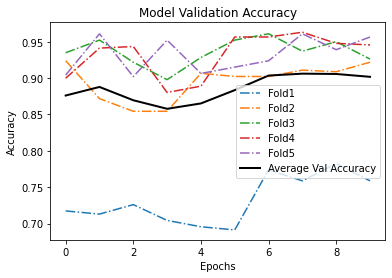

In [106]:
plot_val_accuracy(history)